# Data preprocessing

In [1]:
import tensorflow as tf


dataset_dir = '/kaggle/input/fruits-dataset-for-classification'

batch_size = 16

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,  
    subset="training",
    shuffle=True,
    seed=123,  
    image_size=(224, 224),  
    batch_size=batch_size,
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=batch_size
)

# # Enable data prefetching for better performance
# AUTOTUNE = tf.data.experimental.AUTOTUNE
# train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
# validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

2024-04-30 16:36:45.265393: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 16:36:45.265524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 16:36:45.392412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1655 files belonging to 6 classes.
Using 1324 files for training.
Found 1655 files belonging to 6 classes.
Using 331 files for validation.


# Data augmentation 

In [2]:
rescale = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

# Custom model

In [3]:
base_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
    tf.keras.layers.Conv2D(8, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
    tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1200, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')

])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
base_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 4)    │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 4)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 8)    │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     5,530,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         7,206 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,544,462 (21.15 MB)

 Trainable params: 5,544,342 (21.15 MB)

 Non-trainable params: 120 (480.00 B)

In [5]:
model = tf.keras.models.Sequential([
    rescale,
    data_augmentation,
    base_model
])

In [6]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

# Training

In [7]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    verbose=2
)

Epoch 1/30
83/83 - 9s - 107ms/step - accuracy: 0.2266 - loss: 2.7193 - val_accuracy: 0.2024 - val_loss: 1.8319
Epoch 2/30
83/83 - 2s - 24ms/step - accuracy: 0.3255 - loss: 2.1957 - val_accuracy: 0.2024 - val_loss: 1.9156
Epoch 3/30
83/83 - 2s - 24ms/step - accuracy: 0.3535 - loss: 1.9316 - val_accuracy: 0.2477 - val_loss: 1.9422
Epoch 4/30
83/83 - 2s - 24ms/step - accuracy: 0.3958 - loss: 1.7365 - val_accuracy: 0.3021 - val_loss: 1.8110
Epoch 5/30
83/83 - 2s - 24ms/step - accuracy: 0.4215 - loss: 1.6315 - val_accuracy: 0.1631 - val_loss: 2.1981
Epoch 6/30
83/83 - 2s - 25ms/step - accuracy: 0.4418 - loss: 1.5655 - val_accuracy: 0.1511 - val_loss: 3.3631
Epoch 7/30
83/83 - 2s - 24ms/step - accuracy: 0.4841 - loss: 1.4603 - val_accuracy: 0.1511 - val_loss: 3.0963
Epoch 8/30
83/83 - 2s - 24ms/step - accuracy: 0.4879 - loss: 1.3808 - val_accuracy: 0.5257 - val_loss: 1.3123
Epoch 9/30
83/83 - 2s - 23ms/step - accuracy: 0.5174 - loss: 1.3321 - val_accuracy: 0.1571 - val_loss: 3.0457
Epoch 10/

# Evaluation

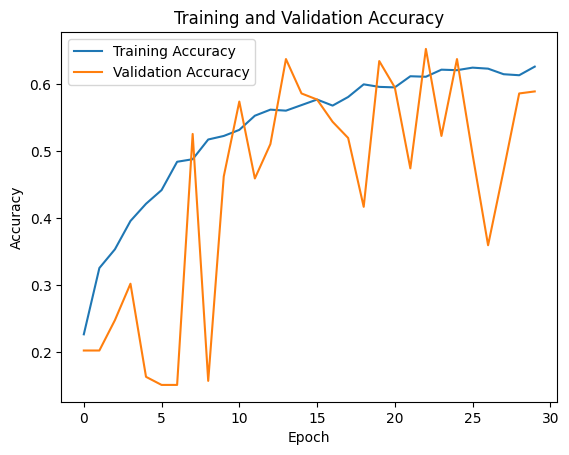

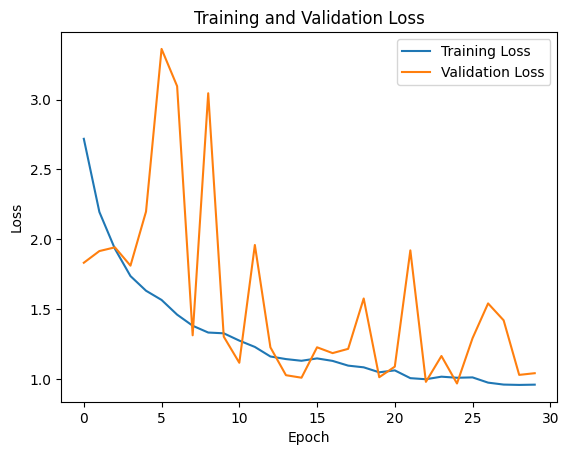

In [8]:
import matplotlib.pyplot as plt

# Extract the training and validation metrics from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Transfer learning

In [9]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [10]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  
    input_shape=(224, 224, 3),
    include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
base_model.trainable = False

In [12]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = rescale
x = data_augmentation
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(6, activation='softmax')(x) 
model = tf.keras.Model(inputs, outputs)

In [13]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,717,766 (56.14 MB)

 Trainable params: 3,078 (12.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics=['accuracy'])

In [15]:
num_samples_train = tf.data.experimental.cardinality(train_dataset).numpy()
num_samples_val = tf.data.experimental.cardinality(validation_dataset).numpy()

history = model.fit(train_dataset,
          validation_data=validation_dataset,
          steps_per_epoch=int(num_samples_train/batch_size),
          validation_steps=int(num_samples_val/batch_size),
          epochs=100)

Epoch 1/100


2024-04-30 16:38:12.594289: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.89842, expected 3.37692
2024-04-30 16:38:12.594371: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 3.13412, expected 2.61262
2024-04-30 16:38:12.594388: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 3.08377, expected 2.56227
2024-04-30 16:38:12.594418: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14: 4.1021, expected 3.5806
2024-04-30 16:38:12.594434: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 3.76539, expected 3.24388
2024-04-30 16:38:12.594445: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 4.19841, expected 3.6769
2024-04-30 16:38:12.594455: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 63: 3.88366, expected 3.36216
2024-04-30 16:38:12.594466: E external/local_xla/xla

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1602 - loss: 27.7913

I0000 00:00:1714495101.823392      76 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 298ms/step - accuracy: 0.1585 - loss: 27.6722 - val_accuracy: 0.1250 - val_loss: 22.2659
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1635 - loss: 25.3068 - val_accuracy: 0.0625 - val_loss: 27.5363
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1755 - loss: 20.9966 - val_accuracy: 0.1875 - val_loss: 19.1337
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1613 - loss: 20.5866 - val_accuracy: 0.0625 - val_loss: 17.0646
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2009 - loss: 17.1520 - val_accuracy: 0.1875 - val_loss: 12.1396
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1394 - loss: 19.5349 - val_accuracy: 0.0625 - val_loss: 16.1399
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1174 - loss: 22.1462 - val_accuracy: 0.1250 - val_loss: 15.4555
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1668 - loss: 18.1374 - val_accuracy: 0.0625 - val_

2024-04-30 16:38:27.568807: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.37359, expected 2.7841
2024-04-30 16:38:27.568890: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.43935, expected 3.84986
2024-04-30 16:38:27.568902: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 4.60416, expected 4.01467
2024-04-30 16:38:27.568912: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.68174, expected 4.09225
2024-04-30 16:38:27.568941: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 4.80871, expected 4.21922
2024-04-30 16:38:27.568955: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 4.51692, expected 3.92744
2024-04-30 16:38:27.568988: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 4.75989, expected 4.1704
2024-04-30 16:38:27.569003: E external/local_xla/xla/serv

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.1903 - loss: 15.9848 - val_accuracy: 0.3750 - val_loss: 5.9526
Epoch 18/100
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.2500 - loss: 13.3910

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2670 - loss: 12.8932 - val_accuracy: 0.1250 - val_loss: 10.9580
Epoch 19/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2014 - loss: 12.5047 - val_accuracy: 0.3125 - val_loss: 8.6498
Epoch 20/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2280 - loss: 14.7221 - val_accuracy: 0.4375 - val_loss: 9.8833
Epoch 21/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2492 - loss: 13.7826

2024-04-30 16:38:36.851170: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.18376, expected 3.42997
2024-04-30 16:38:36.851237: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.33565, expected 4.58186
2024-04-30 16:38:36.851253: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.70509, expected 3.95129
2024-04-30 16:38:36.851268: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.361, expected 4.60721
2024-04-30 16:38:36.851289: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.17522, expected 4.42143
2024-04-30 16:38:36.851303: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 4.39461, expected 3.64082
2024-04-30 16:38:36.851315: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 4.45438, expected 3.70059
2024-04-30 16:38:36.851328: E external/local_xla/xla/serv

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2451 - loss: 13.7738 - val_accuracy: 0.2727 - val_loss: 130.8549
Epoch 22/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2906 - loss: 13.7417 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2523 - loss: 12.5745 - val_accuracy: 0.3750 - val_loss: 10.9302
Epoch 24/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2964 - loss: 11.4492 - val_accuracy: 0.3125 - val_loss: 7.7598
Epoch 25/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3063 - loss: 10.2780 - val_accuracy: 0.3125 - val_loss: 6.8741
Epoch 26/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3408 - loss: 10.1123 - val_accuracy: 0.4375 - val_loss: 6.0353
Epoch 27/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2981 - loss: 12.8347 - val_accuracy: 0.4375 - val_loss: 5.7073
Epoch 28/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3382 - loss: 10.2645 - val_accuracy: 0.4375

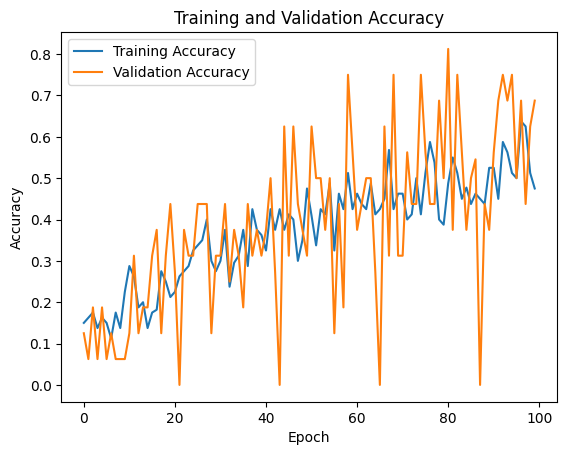

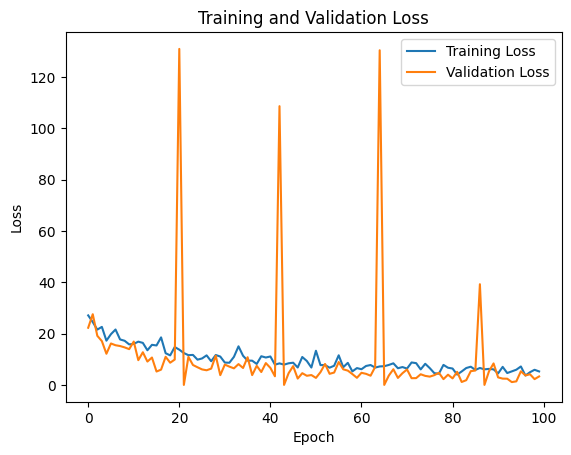

In [16]:
import matplotlib.pyplot as plt

# Extract the training and validation metrics from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()